In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
data= pd.read_csv('titanic_train.csv')#,index_col=0)

In [93]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
del data['PassengerId']

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [96]:
data['Ticket'].nunique()

681

In [97]:
data['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [98]:
data[data['Ticket']=='347082']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [99]:
681/891

0.7643097643097643

In [100]:
del data['Ticket']

In [101]:
del data['Name']

In [102]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [103]:
pd.isnull(data).sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [104]:
100*(pd.isnull(data).sum()/len(data))

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [105]:
del data['Cabin']

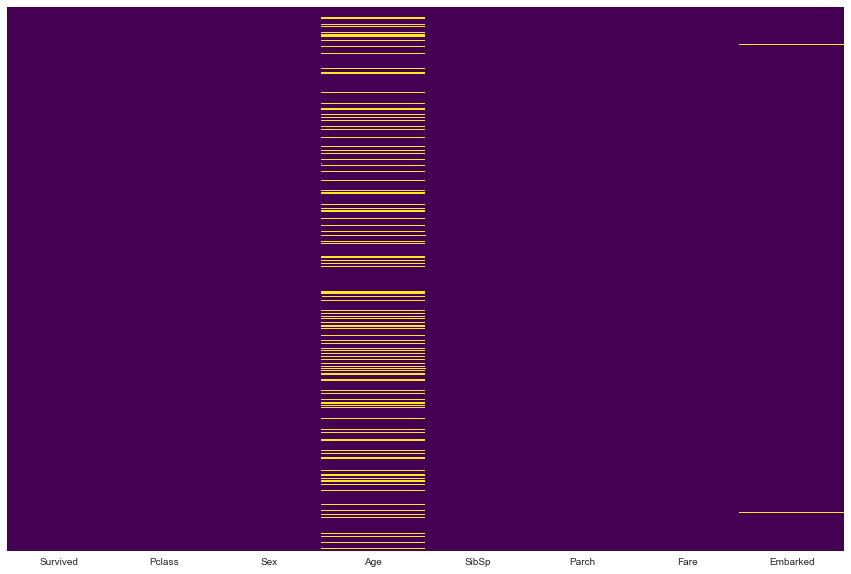

In [106]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.isnull(data),cmap='viridis',cbar=False,yticklabels=[])

In [107]:
100*(pd.isnull(data).sum()/len(data))

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

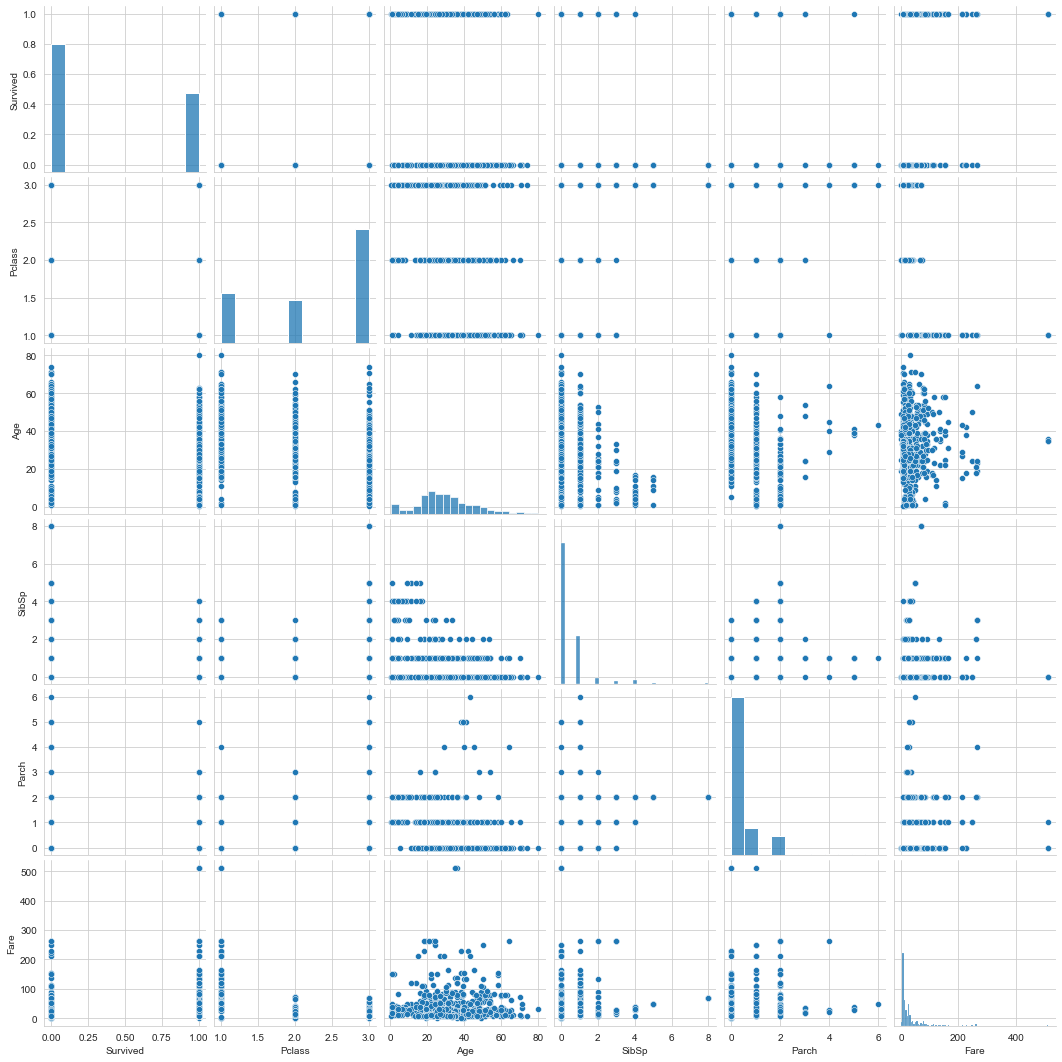

In [108]:
sns.pairplot(data)

In [109]:
sns.set_style('whitegrid')

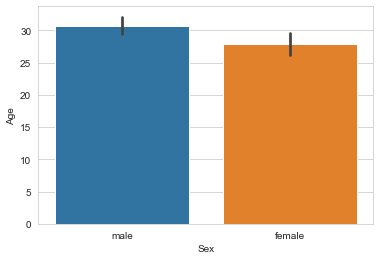

In [110]:
sns.barplot(x='Sex',y='Age',data=data)

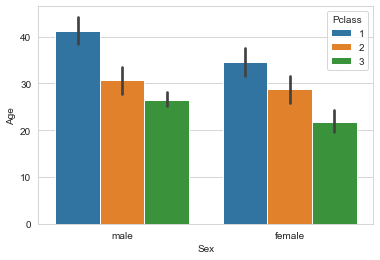

In [111]:
sns.barplot(x='Sex',y='Age',data=data,hue='Pclass')

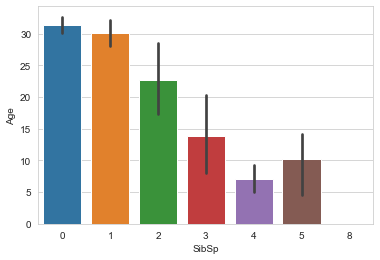

In [112]:
sns.barplot(x='SibSp',y='Age',data=data)

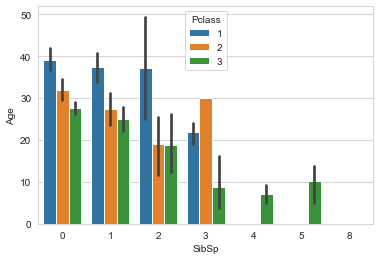

In [113]:
sns.barplot(x='SibSp',y='Age',data=data,hue='Pclass')

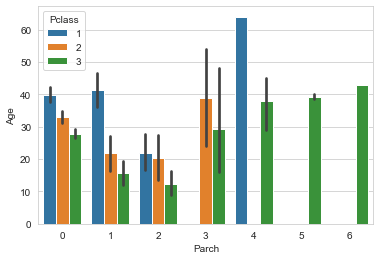

In [114]:
sns.barplot(x='Parch',y='Age',data=data,hue='Pclass')

In [115]:
def fill_missing(x):
    age = x['Age']
    sex = x['Sex']
    pclass = x['Pclass']
    if pd.isnull(age):
        return data[(data['Sex']==sex)&(data['Pclass']==pclass)]['Age'].mean()
    else:
        return age

In [116]:
data['Age'] = data[['Sex','Pclass','Age']].apply(fill_missing,axis=1)

In [117]:
100*(pd.isnull(data).sum()/len(data))

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.224467
dtype: float64

In [118]:
data.dropna(inplace=True)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [120]:
data = pd.get_dummies(data)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [121]:
x = data.drop('Survived',axis=1)
y = data['Survived']

In [122]:
import warnings
warnings.filterwarnings('ignore')

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=100)

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
model_logi = LogisticRegression().fit(xtrain,ytrain)

In [127]:
model_logi.score(xtest,ytest)

0.7865168539325843

In [128]:
ypred = model_logi.predict(xtest)

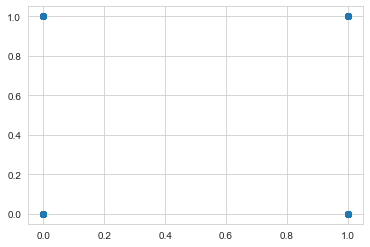

In [129]:
plt.scatter(ytest.values,ypred)

In [130]:
data['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [131]:
ytrain.value_counts()

0    389
1    233
Name: Survived, dtype: int64

In [132]:
ytest.value_counts()

0    160
1    107
Name: Survived, dtype: int64

In [133]:
pd.Series(ypred).value_counts()

0    171
1     96
dtype: int64

In [134]:
from sklearn.metrics import confusion_matrix, classification_report

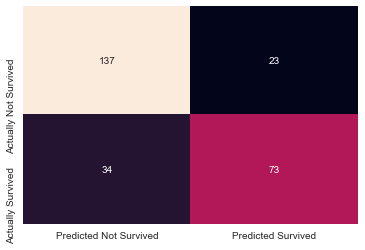

In [135]:
sns.heatmap(pd.DataFrame(confusion_matrix(ytest,ypred),
                         index=['Actually Not Survived','Actually Survived'], 
                         columns = ['Predicted Not Survived','Predicted Survived']), 
            annot=True,cbar=False, fmt='d',)

In [136]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       160
           1       0.76      0.68      0.72       107

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.78      0.79      0.78       267



In [137]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.272115,0.524184,0.382452,32.096681,0.350956,0.649044,0.188976,0.086614,0.724409
std,0.486260,0.834700,13.247458,1.103705,0.806761,49.697504,0.477538,0.477538,0.391710,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.750000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
pclass = pd.DataFrame(pd.get_dummies(data['Pclass']).values,columns=['Pclass_1','Pclass_2','Pclass_3'], index=data.index)
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [139]:
data['SibSp'].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [140]:
sibsp = pd.DataFrame(pd.get_dummies(data['SibSp']).values,columns=['SibSp_0','SibSp_1','SibSp_2','SibSp_3','SibSp_4','SibSp_5','SibSp_8'], index=data.index)

In [141]:
data['Parch'].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [142]:
parch = pd.DataFrame(pd.get_dummies(data['Parch']).values,columns=['Parch_0','Parch_1','Parch_2','Parch_3','Parch_4','Parch_5','Parch_6'], index=data.index)

In [143]:
data = pd.concat([data,pclass,sibsp,parch],axis=1)

In [144]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [145]:
del data['Pclass']
del data['SibSp']
del data['Parch']

In [146]:
del data['Sex_female']

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Age         889 non-null    float64
 2   Fare        889 non-null    float64
 3   Sex_male    889 non-null    uint8  
 4   Embarked_C  889 non-null    uint8  
 5   Embarked_Q  889 non-null    uint8  
 6   Embarked_S  889 non-null    uint8  
 7   Pclass_1    889 non-null    uint8  
 8   Pclass_2    889 non-null    uint8  
 9   Pclass_3    889 non-null    uint8  
 10  SibSp_0     889 non-null    uint8  
 11  SibSp_1     889 non-null    uint8  
 12  SibSp_2     889 non-null    uint8  
 13  SibSp_3     889 non-null    uint8  
 14  SibSp_4     889 non-null    uint8  
 15  SibSp_5     889 non-null    uint8  
 16  SibSp_8     889 non-null    uint8  
 17  Parch_0     889 non-null    uint8  
 18  Parch_1     889 non-null    uint8  
 19  Parch_2     889 non-null    u

In [148]:
x = data.drop('Survived',axis=1)
y = data['Survived']

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
x_sc = pd.DataFrame(StandardScaler().fit_transform(x),columns=x.columns)
x_sc.head()

,Age,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,SibSp_0,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,-0.549253,-0.500240,0.735342,-0.482711,-0.307941,0.616794,-0.563060,-0.510875,0.900328,-1.463333,...,-0.143756,-0.075207,-0.089087,0.561328,-0.391213,-0.314464,-0.075207,-0.067229,-0.075207,-0.033558
1,0.659206,0.788947,-1.359911,2.071634,-0.307941,-1.621287,1.776008,-0.510875,-1.110706,-1.463333,...,-0.143756,-0.075207,-0.089087,0.561328,-0.391213,-0.314464,-0.075207,-0.067229,-0.075207,-0.033558
2,-0.247139,-0.486650,-1.359911,-0.482711,-0.307941,0.616794,-0.563060,-0.510875,0.900328,0.683372,...,-0.143756,-0.075207,-0.089087,0.561328,-0.391213,-0.314464,-0.075207,-0.067229,-0.075207,-0.033558
3,0.432620,0.422861,-1.359911,-0.482711,-0.307941,0.616794,1.776008,-0.510875,-1.110706,-1.463333,...,-0.143756,-0.075207,-0.089087,0.561328,-0.391213,-0.314464,-0.075207,-0.067229,-0.075207,-0.033558
4,0.432620,-0.484133,0.735342,-0.482711,-0.307941,0.616794,-0.563060,-0.510875,0.900328,0.683372,...,-0.143756,-0.075207,-0.089087,0.561328,-0.391213,-0.314464,-0.075207,-0.067229,-0.075207,-0.033558


In [151]:
x_sc.describe()

,Age,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,SibSp_0,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
count,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,...,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02
mean,-1.520781e-16,1.092115e-16,-3.601668e-16,4.402178e-17,-7.193346e-17,1.064016e-16,2.816145e-16,6.993531e-18,3.157080e-16,2.964758e-16,...,-2.653795e-17,3.090266e-16,-1.152996e-16,2.018133e-16,2.381547e-16,-8.392237e-17,3.579814e-16,1.219185e-16,3.096511e-16,2.134900e-16
std,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,...,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00
min,-2.179162e+00,-6.462044e-01,-1.359911e+00,-4.827108e-01,-3.079409e-01,-1.621287e+00,-5.630604e-01,-5.108746e-01,-1.110706e+00,-1.463333e+00,...,-1.437564e-01,-7.520710e-02,-8.908708e-02,-1.781491e+00,-3.912135e-01,-3.144639e-01,-7.520710e-02,-6.722926e-02,-7.520710e-02,-3.355780e-02
25%,-5.681354e-01,-4.872378e-01,-1.359911e+00,-4.827108e-01,-3.079409e-01,-1.621287e+00,-5.630604e-01,-5.108746e-01,-1.110706e+00,-1.463333e+00,...,-1.437564e-01,-7.520710e-02,-8.908708e-02,5.613277e-01,-3.912135e-01,-3.144639e-01,-7.520710e-02,-6.722926e-02,-7.520710e-02,-3.355780e-02
50%,-2.088010e-01,-3.551972e-01,7.353420e-01,-4.827108e-01,-3.079409e-01,6.167940e-01,-5.630604e-01,-5.108746e-01,9.003281e-01,6.833716e-01,...,-1.437564e-01,-7.520710e-02,-8.908708e-02,5.613277e-01,-3.912135e-01,-3.144639e-01,-7.520710e-02,-6.722926e-02,-7.520710e-02,-3.355780e-02
75%,5.081482e-01,-2.207954e-02,7.353420e-01,-4.827108e-01,-3.079409e-01,6.167940e-01,-5.630604e-01,-5.108746e-01,9.003281e-01,6.833716e-01,...,-1.437564e-01,-7.520710e-02,-8.908708e-02,5.613277e-01,-3.912135e-01,-3.144639e-01,-7.520710e-02,-6.722926e-02,-7.520710e-02,-3.355780e-02
max,3.831410e+00,9.668551e+00,7.353420e-01,2.071634e+00,3.247377e+00,6.167940e-01,1.776008e+00,1.957427e+00,9.003281e-01,6.833716e-01,...,6.956212e+00,1.329662e+01,1.122497e+01,5.613277e-01,2.556149e+00,3.180016e+00,1.329662e+01,1.487447e+01,1.329662e+01,2.979933e+01


In [152]:
x_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         889 non-null    float64
 1   Fare        889 non-null    float64
 2   Sex_male    889 non-null    float64
 3   Embarked_C  889 non-null    float64
 4   Embarked_Q  889 non-null    float64
 5   Embarked_S  889 non-null    float64
 6   Pclass_1    889 non-null    float64
 7   Pclass_2    889 non-null    float64
 8   Pclass_3    889 non-null    float64
 9   SibSp_0     889 non-null    float64
 10  SibSp_1     889 non-null    float64
 11  SibSp_2     889 non-null    float64
 12  SibSp_3     889 non-null    float64
 13  SibSp_4     889 non-null    float64
 14  SibSp_5     889 non-null    float64
 15  SibSp_8     889 non-null    float64
 16  Parch_0     889 non-null    float64
 17  Parch_1     889 non-null    float64
 18  Parch_2     889 non-null    float64
 19  Parch_3     889 non-null    f

In [153]:
x_sc.astype('float16')

,Age,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,SibSp_0,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,-0.549316,-0.500000,0.735352,-0.482666,-0.307861,0.616699,-0.562988,-0.510742,0.900391,-1.462891,...,-0.143799,-0.075195,-0.089111,0.561523,-0.391113,-0.314453,-0.075195,-0.0672,-0.075195,-0.033569
1,0.659180,0.789062,-1.360352,2.072266,-0.307861,-1.621094,1.776367,-0.510742,-1.110352,-1.462891,...,-0.143799,-0.075195,-0.089111,0.561523,-0.391113,-0.314453,-0.075195,-0.0672,-0.075195,-0.033569
2,-0.247192,-0.486572,-1.360352,-0.482666,-0.307861,0.616699,-0.562988,-0.510742,0.900391,0.683594,...,-0.143799,-0.075195,-0.089111,0.561523,-0.391113,-0.314453,-0.075195,-0.0672,-0.075195,-0.033569
3,0.432617,0.422852,-1.360352,-0.482666,-0.307861,0.616699,1.776367,-0.510742,-1.110352,-1.462891,...,-0.143799,-0.075195,-0.089111,0.561523,-0.391113,-0.314453,-0.075195,-0.0672,-0.075195,-0.033569
4,0.432617,-0.484131,0.735352,-0.482666,-0.307861,0.616699,-0.562988,-0.510742,0.900391,0.683594,...,-0.143799,-0.075195,-0.089111,0.561523,-0.391113,-0.314453,-0.075195,-0.0672,-0.075195,-0.033569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.171631,-0.384521,0.735352,-0.482666,-0.307861,0.616699,-0.562988,1.957031,-1.110352,0.683594,...,-0.143799,-0.075195,-0.089111,0.561523,-0.391113,-0.314453,-0.075195,-0.0672,-0.075195,-0.033569
885,-0.775879,-0.042206,-1.360352,-0.482666,-0.307861,0.616699,1.776367,-0.510742,-1.110352,0.683594,...,-0.143799,-0.075195,-0.089111,0.561523,-0.391113,-0.314453,-0.075195,-0.0672,-0.075195,-0.033569
886,-0.568359,-0.174072,-1.360352,-0.482666,-0.307861,0.616699,-0.562988,-0.510742,0.900391,-1.462891,...,-0.143799,-0.075195,-0.089111,-1.781250,-0.391113,3.179688,-0.075195,-0.0672,-0.075195,-0.033569
887,-0.247192,-0.042206,0.735352,2.072266,-0.307861,-1.621094,1.776367,-0.510742,-1.110352,0.683594,...,-0.143799,-0.075195,-0.089111,0.561523,-0.391113,-0.314453,-0.075195,-0.0672,-0.075195,-0.033569


In [154]:
xtrain,xtest,ytrain,ytest = train_test_split(x_sc.values, y.values, test_size=0.3, random_state=100)

In [155]:
model_logi_sc = LogisticRegression().fit(xtrain,ytrain)

In [156]:
model_logi_sc.score(xtest,ytest)

0.8089887640449438